No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


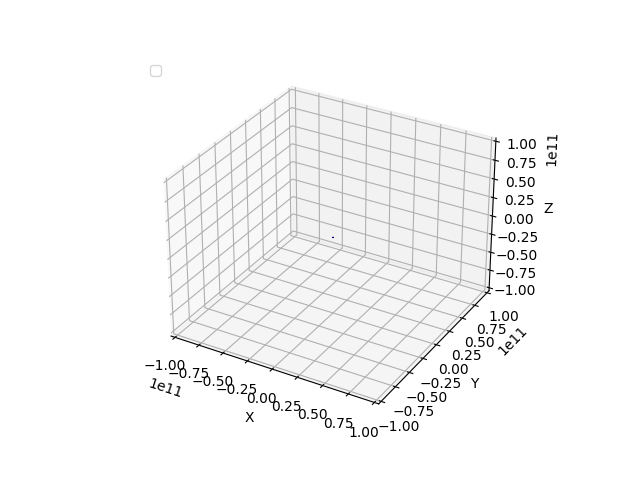

-1096065536.0


In [1]:
%matplotlib widget
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider
from matplotlib.animation import FuncAnimation
import time

anim_speed = 200
lines_to_plot = []
dataframe_plot = pd.read_csv("output.csv")
dataframe_array = np.array(dataframe_plot).T

lines = []

for n in range(0,9):
    m = n * 3
    lines_to_plot.append(([dataframe_array[m + 0], dataframe_array[m + 1], dataframe_array[m + 2]]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for n in range(0,8):
    m = n * 3
    lines.append(ax.plot([], [], [])[0])

def init():
    for line in lines:
        line.set_data([], [])
        line.set_3d_properties([])
    return lines

def update(frame):
    frame = int(frame * anim_speed)

    for line in range(0,len(lines)):
        lines[line].set_data(lines_to_plot[line][0][:frame],lines_to_plot[line][1][:frame])
        lines[line].set_3d_properties(lines_to_plot[line][2][:frame])
    return lines

# Create the animation
ani = FuncAnimation(fig, update, frames=int(len(lines_to_plot[0][0][:]) / anim_speed), init_func=init, repeat=True)

leg = plt.legend(loc='upper left')

    
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

ax.set_xlabel('X')

ax.set_ylabel('Y')

ax.set_zlabel('Z')


x = 696340000 * np.outer(np.cos(u), np.sin(v))
y = 696340000 * np.outer(np.sin(u), np.sin(v))
z = 696340000 * np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z, rstride=4, cstride=4, color='b')

# The area that the graph will show upon start
GraphAreaStart = 100000000000

ax.set_xlim3d(-1 * GraphAreaStart, GraphAreaStart)
ax.set_ylim3d(-1 * GraphAreaStart, GraphAreaStart)
ax.set_zlim3d(-1 * GraphAreaStart, GraphAreaStart)
# Display the animation
plt.show()

print((lines_to_plot[1][0][2]))